<a href="https://colab.research.google.com/github/adarsh-kumar-shah/Python-SQL-Project/blob/main/Python%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_excel('./customers.xlsx')
sellers = pd.read_excel('./sellers.xlsx')
order_items = pd.read_excel('./order_items.xlsx')
orders = pd.read_excel('./orders.xlsx')
payments = pd.read_excel('./payments.xlsx')
products = pd.read_excel('./products.xlsx')

geolocation = pd.read_csv('./geolocation.csv')




**DATA CLEANING**

In [5]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [9]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [15]:
order_items.info()
print("_" * 50)
orders.info()
print("_" * 50)
payments.info()
print("_" * 50)
products.info()
print("_" * 50)
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----    

In [24]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

In [25]:
customers.drop_duplicates(inplace=True)
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [26]:
geolocation.drop_duplicates(inplace=True)
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


In [27]:
order_items.drop_duplicates(inplace=True)
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [29]:
orders.drop_duplicates(inplace=True)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [30]:
payments.drop_duplicates(inplace=True)
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [31]:
products.drop_duplicates(inplace=True)
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product category            32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [32]:
sellers.drop_duplicates(inplace=True)
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


**BASIC PROBLEMS**


1. Unique Cities

In [33]:
unique_cities = customers['customer_city'].unique()
print(f"Total Unique Cities: {len(unique_cities)}")

Total Unique Cities: 4119


2. Orders in 2017

In [34]:
orders_2017 = orders[orders['order_purchase_timestamp'].dt.year == 2017].shape[0]
print(f"Orders placed in 2017: {orders_2017}")

Orders placed in 2017: 45101


3. Total sales per category

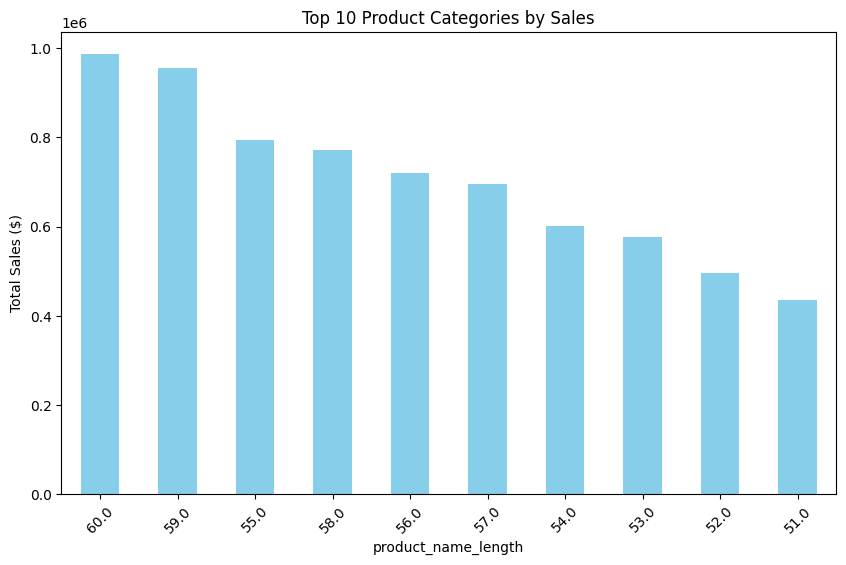

In [35]:
sales_cat = pd.merge(order_items, products, on='product_id')
top_sales_cat = sales_cat.groupby('product_name_length')['price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_sales_cat.plot(kind='bar', color='skyblue')
plt.title('Top 10 Product Categories by Sales')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()

4. Percentage of orders paid in installments

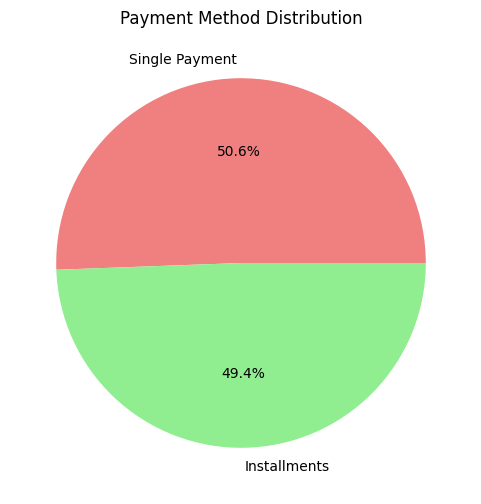

In [36]:
inst_count = payments['payment_installments'].apply(lambda x: 'Installments' if x > 1 else 'Single Payment').value_counts()
plt.figure(figsize=(6, 6))
inst_count.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()

5. Customers per state

/tmp/ipython-input-249211764.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette='magma')


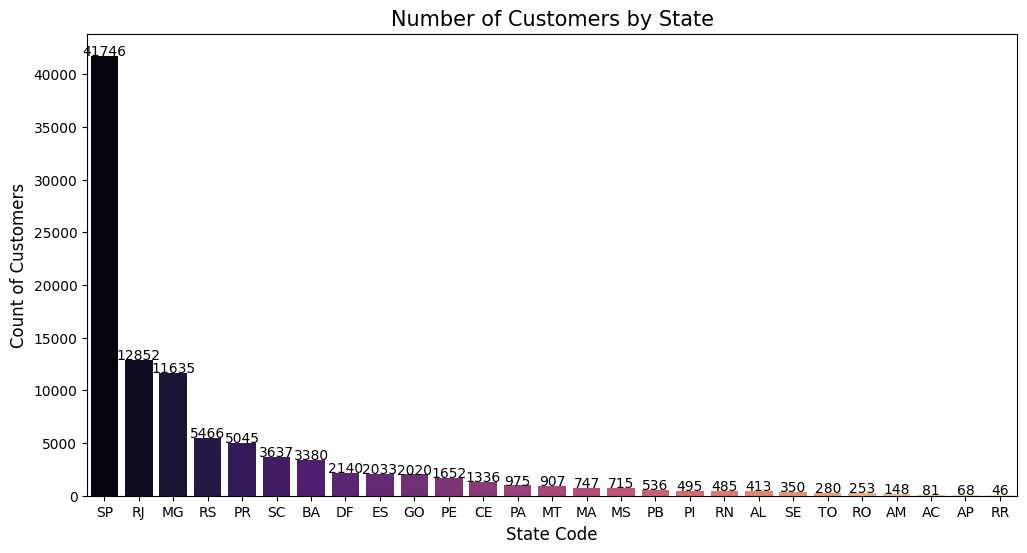

In [38]:
state_counts = customers['customer_state'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='magma')

plt.title('Number of Customers by State', fontsize=15)
plt.xlabel('State Code', fontsize=12)
plt.ylabel('Count of Customers', fontsize=12)

for i, value in enumerate(state_counts.values):
    plt.text(i, value + 50, str(value), ha='center', fontsize=10)

plt.show()

**INTERMEDIATE QUESTIONS**

1. Orders per month in 2018

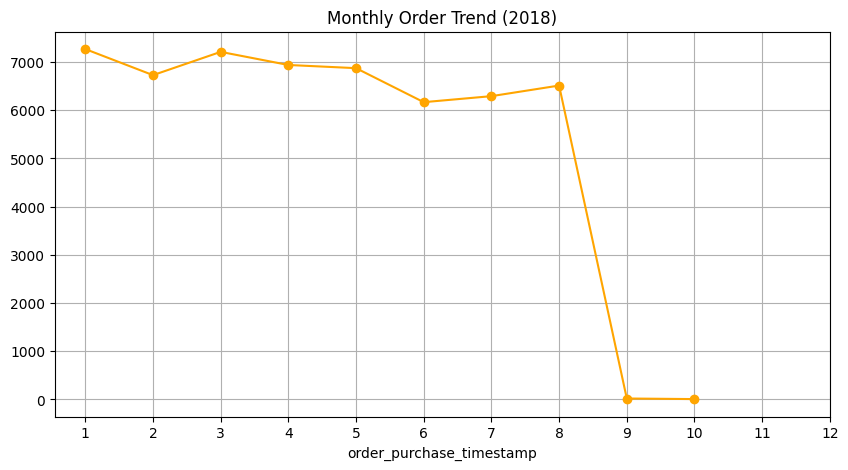

In [39]:
orders_2018 = orders[orders['order_purchase_timestamp'].dt.year == 2018]
monthly_orders = orders_2018.groupby(orders_2018['order_purchase_timestamp'].dt.month).size()

plt.figure(figsize=(10, 5))
monthly_orders.plot(kind='line', marker='o', color='orange')
plt.title('Monthly Order Trend (2018)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

2. Avg Products per Order by City

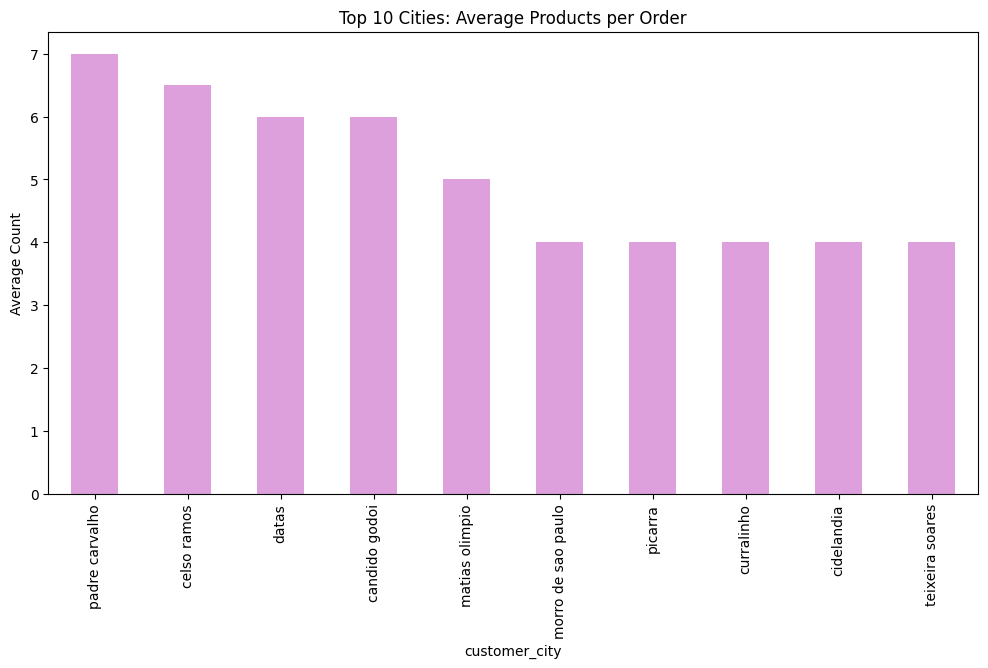

In [40]:
items_per_order = order_items.groupby('order_id').size().reset_index(name='product_count')

order_city_mapping = pd.merge(orders[['order_id', 'customer_id']], items_per_order, on='order_id')
city_order_stats = pd.merge(order_city_mapping, customers[['customer_id', 'customer_city']], on='customer_id')

avg_items_city = city_order_stats.groupby('customer_city')['product_count'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_items_city.head(10).plot(kind='bar', color='plum')
plt.title('Top 10 Cities: Average Products per Order')
plt.ylabel('Average Count')
plt.show()

3. Percentage Revenue per Category

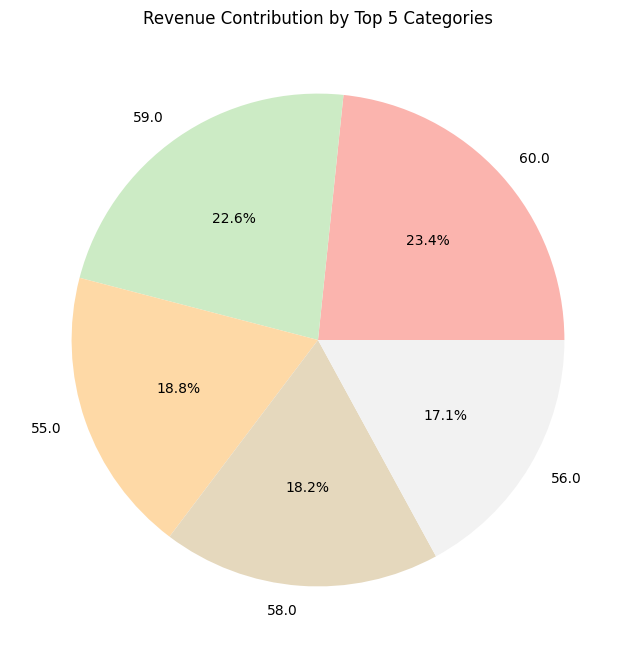

In [41]:
rev_per_cat = pd.merge(order_items[['product_id', 'price']], products[['product_id', 'product_name_length']], on='product_id')

total_revenue = rev_per_cat['price'].sum()
category_revenue = rev_per_cat.groupby('product_name_length')['price'].sum()

cat_rev_pct = (category_revenue / total_revenue) * 100
cat_rev_pct = cat_rev_pct.sort_values(ascending=False)

plt.figure(figsize=(8, 8))
cat_rev_pct.head(5).plot(kind='pie', autopct='%1.1f%%', cmap='Pastel1')
plt.title('Revenue Contribution by Top 5 Categories')
plt.ylabel('')
plt.show()

 4. Correlation between Price and Popularity

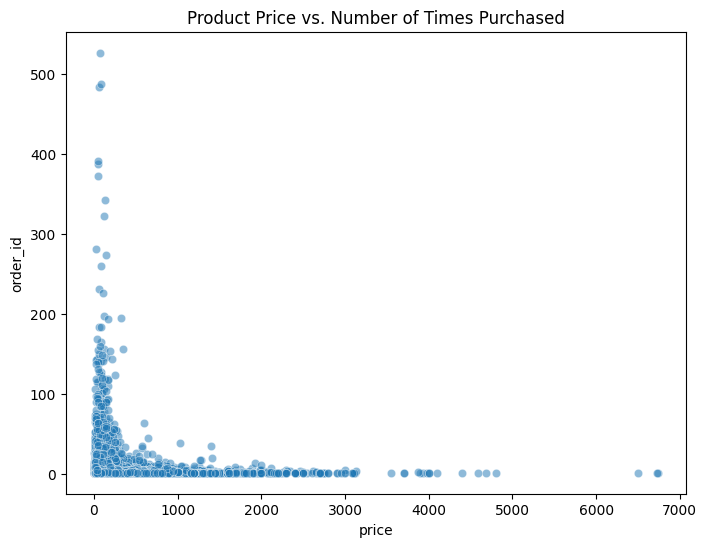

In [42]:
prod_stats = order_items.groupby('product_id').agg({'price': 'mean', 'order_id': 'count'})
plt.figure(figsize=(8, 6))
sns.scatterplot(data=prod_stats, x='price', y='order_id', alpha=0.5)
plt.title('Product Price vs. Number of Times Purchased')
plt.show()

5. Seller Revenue Ranking (Top 10)

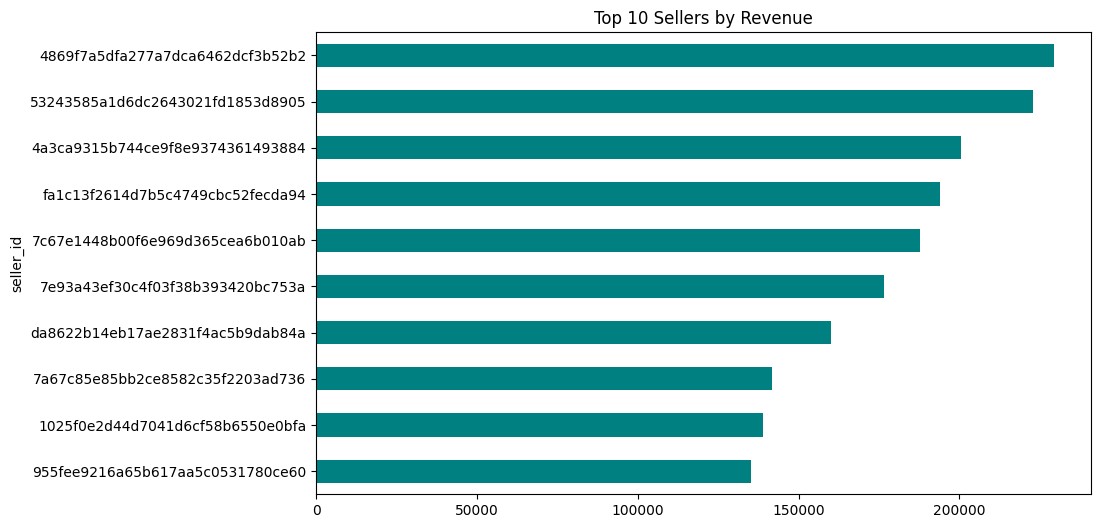

In [43]:
seller_rev = order_items.groupby('seller_id')['price'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
seller_rev.plot(kind='barh', color='teal')
plt.title('Top 10 Sellers by Revenue')
plt.gca().invert_yaxis()
plt.show()

**ADVANCED QUESTIONS**

1. Moving Average of Order Values

2. Cumulative sales per month for each year

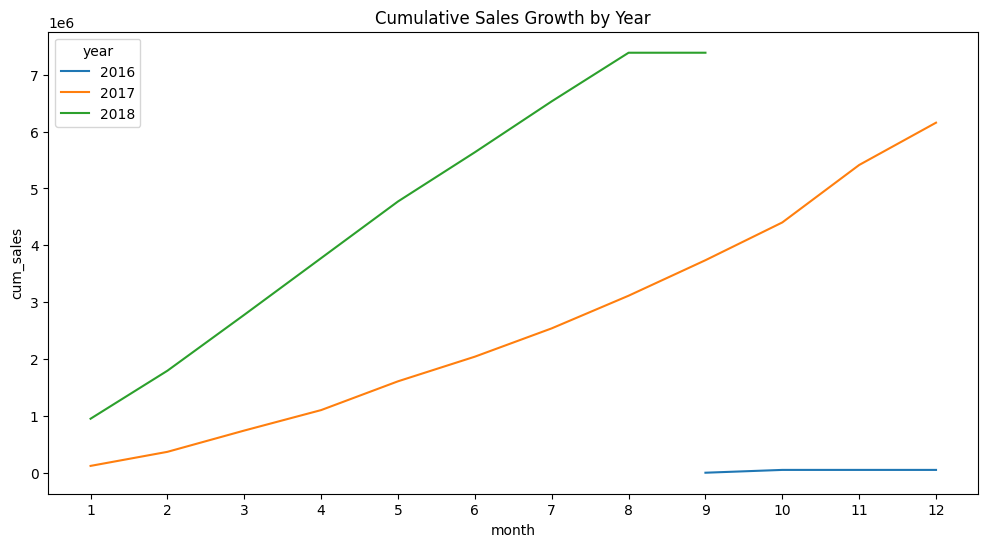

In [44]:
order_val = order_items.groupby('order_id')['price'].sum().reset_index()
sales_trend = pd.merge(orders[['order_id', 'order_purchase_timestamp']], order_val, on='order_id')
sales_trend['year'] = sales_trend['order_purchase_timestamp'].dt.year
sales_trend['month'] = sales_trend['order_purchase_timestamp'].dt.month
monthly_sales = sales_trend.groupby(['year', 'month'])['price'].sum().reset_index()
monthly_sales['cum_sales'] = monthly_sales.groupby('year')['price'].cumsum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='month', y='cum_sales', hue='year', palette='tab10')
plt.title('Cumulative Sales Growth by Year')
plt.xticks(range(1, 13))
plt.show()

3. Year-over-Year (YoY) Growth

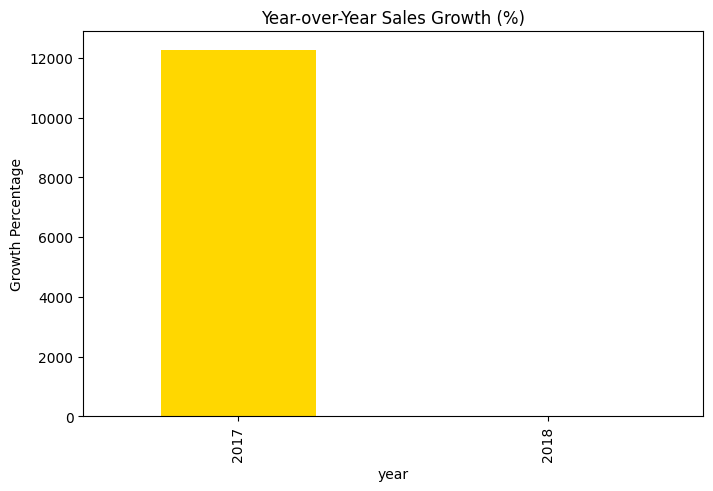

In [45]:
yearly_sales = sales_trend.groupby('year')['price'].sum()
yoy_growth = yearly_sales.pct_change() * 100

plt.figure(figsize=(8, 5))
yoy_growth.dropna().plot(kind='bar', color='gold')
plt.title('Year-over-Year Sales Growth (%)')
plt.ylabel('Growth Percentage')
plt.show()

4. Retention Rate

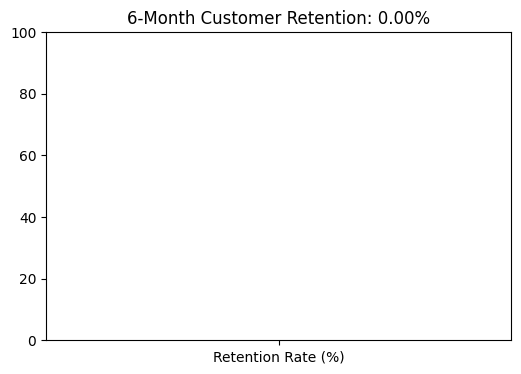

In [46]:
first_purchase = orders.groupby('customer_id')['order_purchase_timestamp'].min().reset_index()
first_purchase.columns = ['customer_id', 'first_order_date']

retention_data = pd.merge(orders[['customer_id', 'order_purchase_timestamp']], first_purchase, on='customer_id')

retention_data['days_diff'] = (retention_data['order_purchase_timestamp'] - retention_data['first_order_date']).dt.days

retained_customers = retention_data[(retention_data['days_diff'] > 0) & (retention_data['days_diff'] <= 180)]['customer_id'].nunique()
total_unique_customers = customers['customer_id'].nunique()

retention_rate = (retained_customers / total_unique_customers) * 100

plt.figure(figsize=(6, 4))
plt.bar(['Retention Rate (%)'], [retention_rate], color='seagreen')
plt.ylim(0, 100)
plt.title(f'6-Month Customer Retention: {retention_rate:.2f}%')
plt.show()

5. Top 3 Customers who spent the most money per year

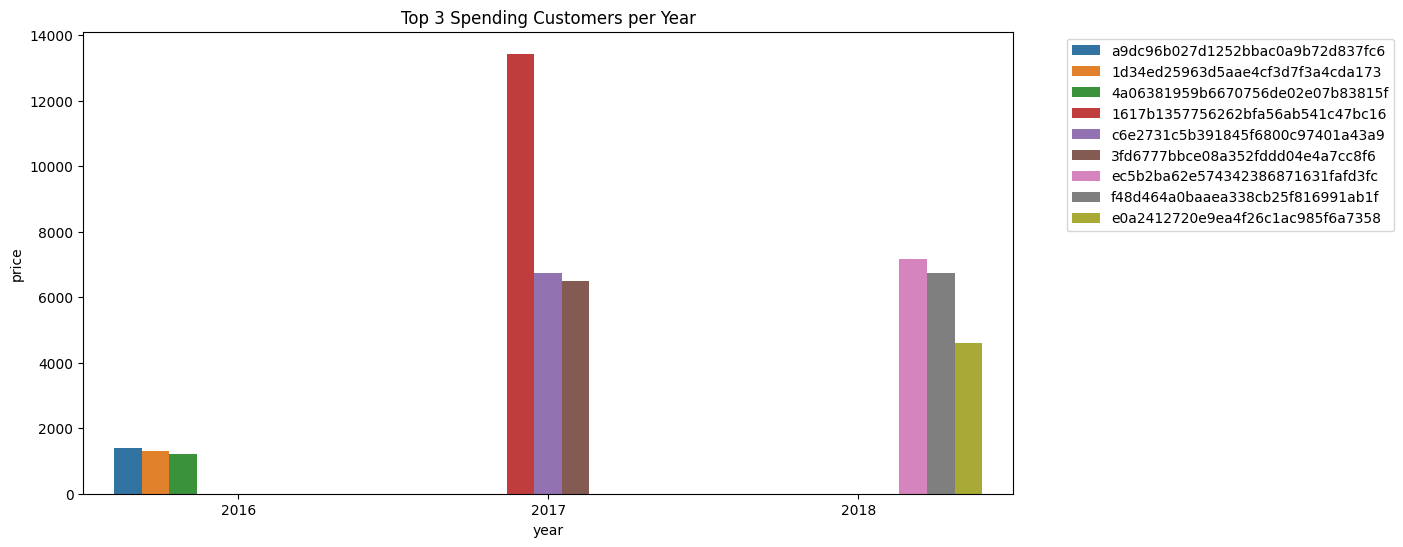

In [47]:
cust_spending = pd.merge(sales_trend, orders[['order_id', 'customer_id']], on='order_id')
yearly_cust = cust_spending.groupby(['year', 'customer_id'])['price'].sum().reset_index()
top_3_per_year = yearly_cust.sort_values(['year', 'price'], ascending=[True, False]).groupby('year').head(3)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_3_per_year, x='year', y='price', hue='customer_id')
plt.title('Top 3 Spending Customers per Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()